In [1]:
import numpy as np, analysis as ana, plottools as pl, prjlib
from matplotlib.pyplot import *

In [2]:
mb, mb0, mb1 = prjlib.binning_all(10,lmin=20,Lsp=2048)
p = prjlib.params_init(stype='lcmb',PSA='s14&15_deep56',doreal='True',dearot='True',rlmin='200')
scb = prjlib.binned_cl_rlz(p.quad.f['EB'].cl,0,200,mb0,mb1)
ocb = prjlib.binned_cl(p.quad.f['EB'].cl[0],mb0,mb1)
fcb = prjlib.binned_claa(2048,mb0,mb1)

1.0 0.42 4.3 0.935


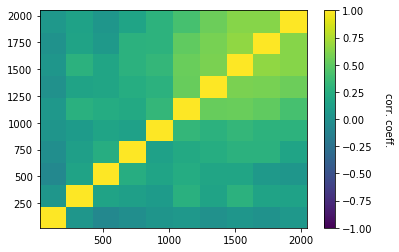

In [7]:
st = ana.PTEs(ocb,scb)
pl.plot_corr(scb,20,2048,clab='corr. coeff.')

In [4]:
for bn in [8,12,14,16,18,20]:
    mb, mb0, mb1 = prjlib.binning_all(bn,lmin=20,Lsp=2048)
    scb = prjlib.binned_cl_rlz(p.quad.f['EB'].cl,0,200,mb0,mb1)
    ocb = prjlib.binned_cl(p.quad.f['EB'].ocls,mb0,mb1)
    st = ana.PTEs(ocb,scb)

for lmin in [10,30,40]:
    mb, mb0, mb1 = prjlib.binning_all(10,lmin=lmin,Lsp=2048)
    scb = prjlib.binned_cl_rlz(p.quad.f['EB'].cl,0,200,mb0,mb1)
    ocb = prjlib.binned_cl(p.quad.f['EB'].ocls,mb0,mb1)
    st = ana.PTEs(ocb,scb)


0.9 0.425 3.1 0.94
1.3 0.43 6.8 0.89
1.3 0.435 6.9 0.945
1.5 0.425 6.0 0.975
1.6 0.425 12.4 0.87
1.9 0.425 13.2 0.935
0.7 0.445 4.8 0.925
1.2 0.42 3.5 0.98
1.0 0.42 4.3 0.935


obs A 0.027 mean(A) 0.011 sigma(A) 0.043 S/N 23.07 A>oA 0.355


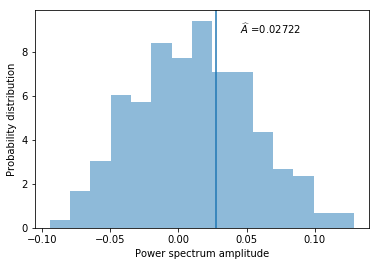

In [5]:
# amplitude estimate
st = ana.amplitude(ocb,scb,fcb=fcb)
xlabel(r'Power spectrum amplitude')
ylabel(r'Probability distribution')
hist(st.A,bins=15,density=1,weights=np.ones_like(st.A)/float(len(st.A)),alpha=.5,lw=0)
figtext(0.60,0.80,r'$\widehat{A}$ ='+str(st.oA)[:7])
axvline(st.oA)
#savefig('fig_null.png',bbox_inches='tight')